# ACIT5900: Master Thesis
### *Exploratory Data Analysis*

>-------------------------------------------
> *Spring 2025*

>--------------------------------------------

<a id="top"></a>
1. [**Basic Statistics**](#statistics)<br>
2. [**Visualize Content Column**](#content-visualization)<br>
3. [**Visualize Publication Year Column**](#others-visualization)<br>
4. [**Co-authorship Knowledge Graph**](#knowledge-graph)<br>

In [1]:
!pip install networkx matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# import modules needed
import string
import pandas as pd
import networkx as nx
from ast import literal_eval
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [3]:
# read data
df = pd.read_csv('df_cleaned.csv')
df.head()

,title,authors,year_published,number,volume,journal,type,content,doi,file,abstract,cleaned_content,cleaned_abstract,cleaned_authors
0,Advanced Passive Operating System Fingerprinti...,"Hagos, Desta Haileselassie and Løland, Martin ...",2020,missing,missing,missing,inproceedings,Advanced Passive Operating System Fingerprinti...,10.1109/ICCCN49398.2020.9209694,doc28,"—Securing and managing large, complex enterpri...",Advanced Passive Operating System Fingerprinti...,"—Securing and managing large, complex enterpri...","['Desta Haileselassie Hagos', 'Martin Løland',..."
1,Artificial intelligence in the fertility clini...,"Riegler, M A and Stensen, M H and Witczak, O a...",2021,9.0,36,Human Reproduction,article,.................................................,10.1093/humrep/deab168,doc14,": In recent years, the amount of data produced...",.................................................,": In recent years, the amount of data produced...","['M A Riegler', 'M H Stensen', 'O Witczak', 'J..."
2,EvoDynamic: A Framework for the Evolution of G...,"Pontes-Filho, Sidney\nand Lind, Pedro\nand Yaz...",2020,missing,missing,missing,inproceedings,EvoDynamic: a framework for the evolution of\n...,missing,doc10,. Dynamical systems possess a computational ca...,EvoDynamic: a framework for the evolution of g...,. Dynamical systems possess a computational ca...,"['Sidney Pontes-Filho', 'Pedro G. Lind', 'Anis..."
3,A general representation of dynamical systems ...,Sidney Pontes{-}Filho and\nAnis Yazidi and\nJi...,2019,missing,abs/1907.01856,CoRR,article,A general representation of dynamical systems ...,missing,doc11,—Dynamical systems are capable of performing c...,A general representation of dynamical systems ...,—Dynamical systems are capable of performing c...,"['Sidney Pontes-Filho', 'Anis Yazidi', 'Jianhu..."
4,Exploring Multilingual Word Embedding Alignmen...,"Aaby, Pernille\nand Biermann, Daniel\nand Yazi...",2023,missing,missing,missing,inproceedings,"\n \n \n \nAccepted manuscript \nAaby, P., Bi...",missing,doc12,". Contextual language models, such as transfor...","Accepted manuscript Aaby, P., Biermann, D., Ya...",". Contextual language models, such as transfor...","['Pernille Aaby', 'Daniel Biermann', 'Anis Yaz..."


## <a id="statistics"></a> 1) Basic Statistics

This section computes basic descriptive statistics for the dataset by analyzing the length of each article’s cleaned content. A new column is created to store the character count of each document, and standard statistical metrics such as mean, minimum, maximum, and quartiles are generated. This provides an overview of the dataset's distribution in terms of document size, helping identify outliers or inconsistencies that may require further attention during preprocessing or modeling.


[⬆️ Back to Top](#top)

In [4]:
# investigate basic statistics
df['text_length'] = df['cleaned_content'].apply(len)  
df['text_length'].describe() 

count        17.000000
mean      51938.470588
std       23881.024088
min       22320.000000
25%       34247.000000
50%       44360.000000
75%       68223.000000
max      109922.000000
Name: text_length, dtype: float64

## <a id="content-visualization"></a> 2) Visualize Content Column

This section explores and visualizes the textual content of the dataset. First, individual words are tokenized from the cleaned content, with stop words, punctuation, and numeric values removed. Word frequencies are then computed to identify the most common terms used across articles. A word cloud is generated to visually represent the frequency distribution, offering an intuitive snapshot of dominant vocabulary. The analysis is extended to bigrams (two-word phrases), where frequently occurring pairs are extracted and visualized in a separate word cloud, excluding irrelevant combinations such as citations or identifiers. This provides a clearer view of prevalent topics and language patterns in the dataset.

[⬆️ Back to Top](#top)

In [5]:
# list of words to remove
stop_words = set(ENGLISH_STOP_WORDS)  

# tokenize the text and remove stop words, punctuation, and numbers
words = ' '.join(df['cleaned_content']).split()
filtered_words = [
    word for word in words 
    if word.lower() not in stop_words and word not in string.punctuation and not word.isdigit()
]

# count word frequencies
word_counts = Counter(filtered_words)

# top 20 most common words
common_words = word_counts.most_common(20)
print(common_words)

[('data', 468), ('et', 402), ('using', 339), ('learning', 323), ('used', 273), ('al.', 253), ('pp.', 245), ('network', 242), ('vol.', 235), ('model', 233), ('J.', 220), ('based', 212), ('number', 205), ('IEEE', 201), ('use', 201), ('M.', 195), ('different', 189), ('results', 188), ('AI', 186), ('S.', 183)]


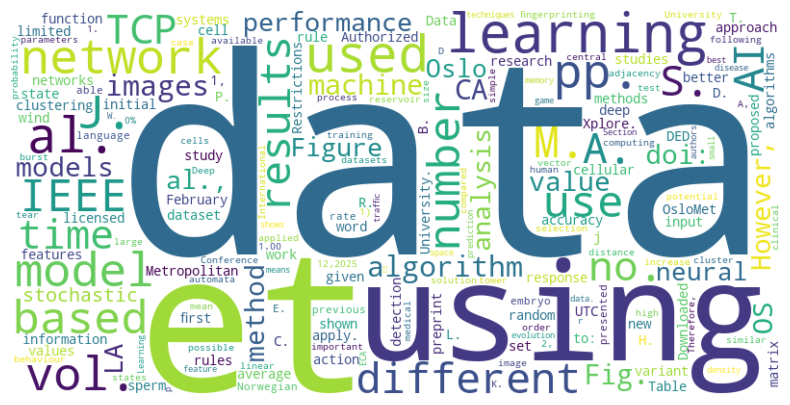

In [6]:
# create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['cleaned_content'])

# extract top 20 bigrams
bigram_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(bigram_df.sum(axis=0).sort_values(ascending=False).head(20)) 


et al                      431
machine learning           141
doi 10                     133
deep learning              114
metropolitan university    105
oslo metropolitan          105
tcp variant                104
oslomet oslo                80
utc ieee                    74
use limited                 74
university downloaded       74
restrictions apply          74
authorized licensed         74
limited oslomet             74
licensed use                74
ieee xplore                 74
downloaded february         74
xplore restrictions         74
cellular automata           73
neural networks             71
dtype: int64


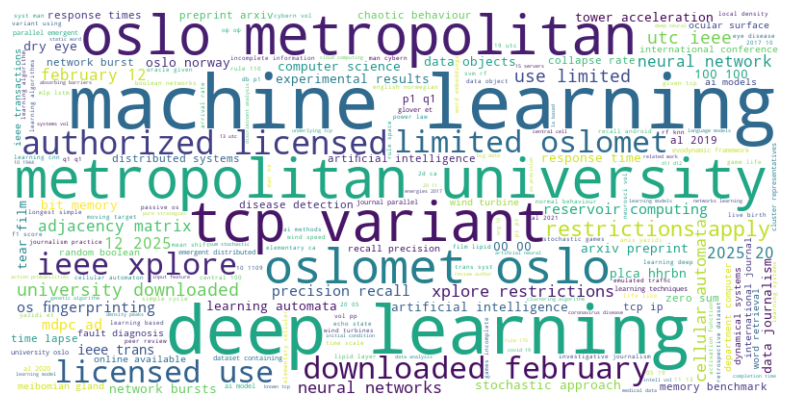

In [8]:
# words to exclude from bigram
stop_words = ['et al', '10 10', 'doi']

# extract bigrams without limiting the number of features
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = vectorizer.fit_transform(df['cleaned_content'])
bigram_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# get all bigrams
all_bigrams = bigram_df.sum(axis=0)

# filter out the unwanted bigrams
filtered_bigrams = all_bigrams[~all_bigrams.index.str.contains('|'.join(stop_words))]

# create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(filtered_bigrams.to_dict())

# plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## <a id="others-visualization"></a> 3) Visualize Publication Year Column

This section provides a visual summary of the distribution of articles by publication year. A bar chart is created using the `year_published` column to show how many articles were extracted for each year. This visualization helps reveal temporal trends in the dataset, such as peaks in publication activity or underrepresented years, which can be useful for understanding the dataset’s coverage and for guiding further analyses.

[⬆️ Back to Top](#top)

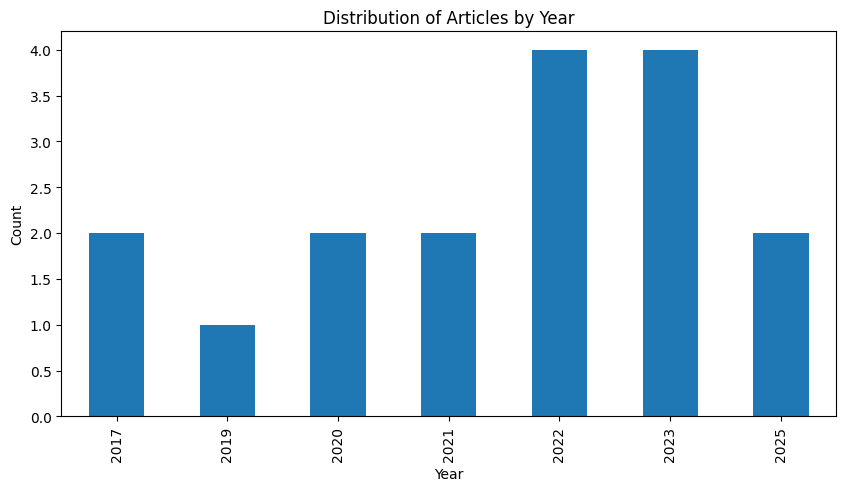

In [9]:
# amount of articles extracted for each year
df['year_published'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.title('Distribution of Articles by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

## <a id="knowledge-graph"></a> 4) Co-authorship Knowledge Graph

This section constructs and visualizes a co-authorship knowledge graph to uncover collaboration patterns among researchers in the dataset. The cleaned list of authors is used to generate edges representing co-authored articles. Each unique pair of co-authors forms an edge, and the frequency of their collaborations determines the edge weight. The resulting graph is created using NetworkX, where nodes represent individual authors and edges reflect the strength of their collaboration. Node size corresponds to the number of connections an author has, and edge thickness indicates how frequently two authors have worked together. The final graph offers an intuitive overview of the research network within the corpus.

[⬆️ Back to Top](#top)

In [10]:
df[['cleaned_authors']]

,cleaned_authors
0,"['Desta Haileselassie Hagos', 'Martin Løland',..."
1,"['M A Riegler', 'M H Stensen', 'O Witczak', 'J..."
2,"['Sidney Pontes-Filho', 'Pedro G. Lind', 'Anis..."
3,"['Sidney Pontes-Filho', 'Anis Yazidi', 'Jianhu..."
4,"['Pernille Aaby', 'Daniel Biermann', 'Anis Yaz..."
5,"['Sidney Pontes-Filho', 'Annelene Gulden Dahl'..."
6,"['Fabrizio Palumbo', 'Adam Buji', 'Anis Yazidi..."
7,"['R. Krøvel M. Fridman', 'Fabrizio Palumbo']"
8,"['Krishna Kumar Sharma', 'Ayan Seal', 'Anis Ya..."
9,"['Tom Eivind Glover', 'Ruben Jahren', 'Frances..."


In [11]:
# convert to python list
df['cleaned_authors'] = df['cleaned_authors'].apply(lambda x: literal_eval(x) if isinstance(x, str) else x)


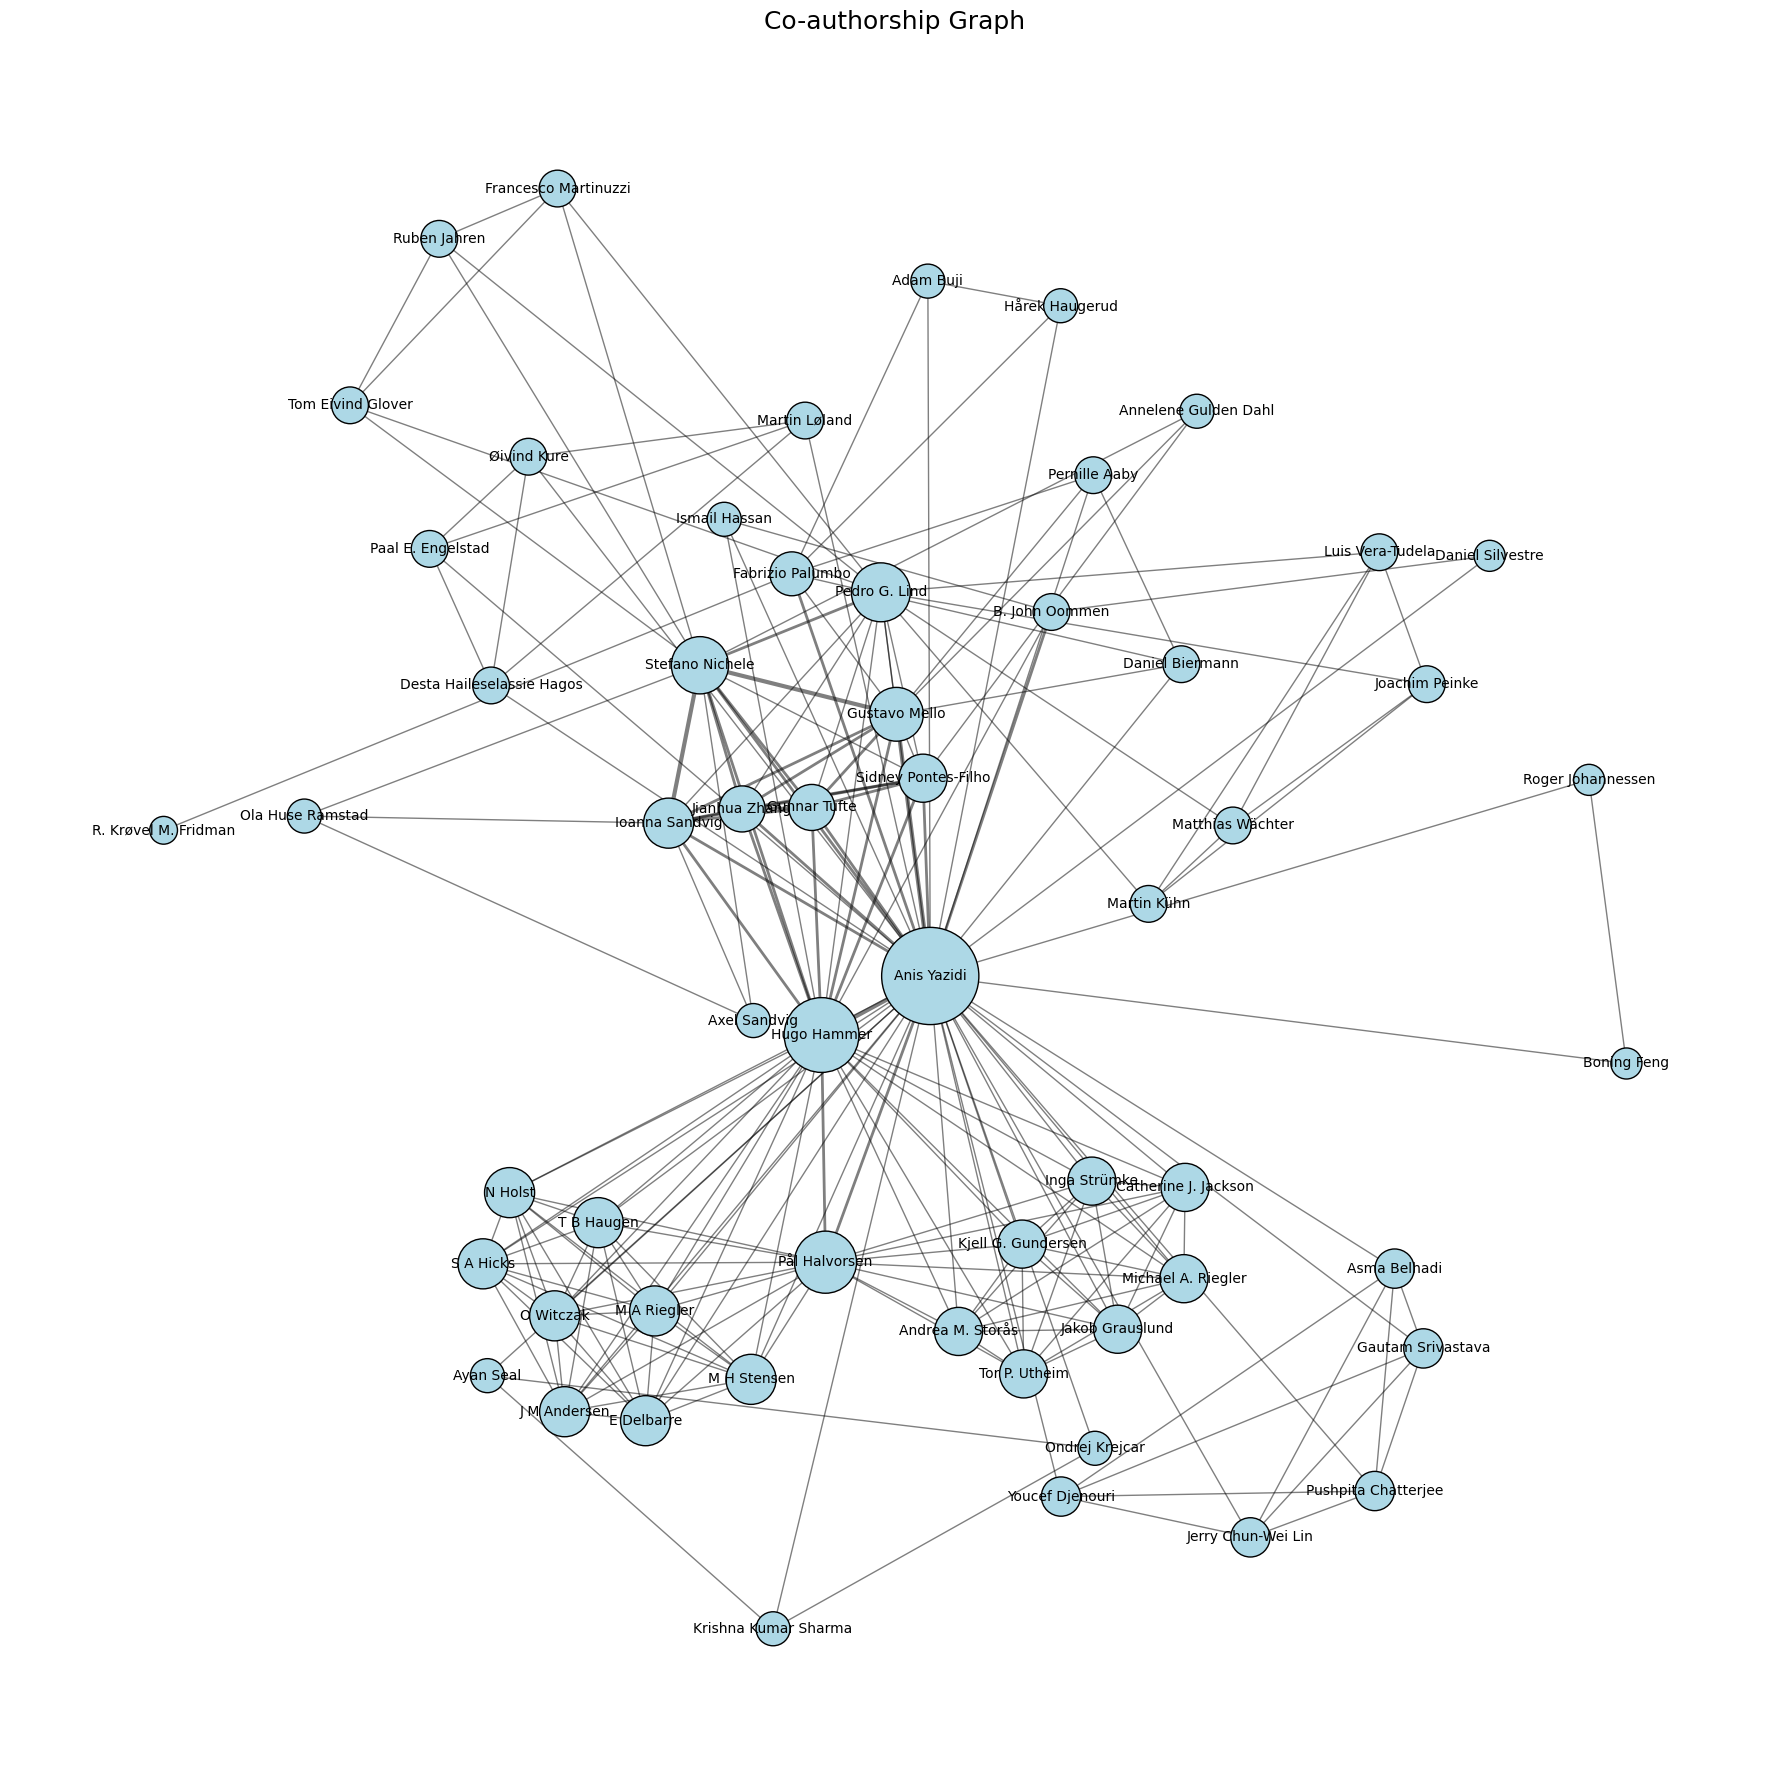

In [12]:
edges = []

# build edges from co-authorship
for authors in df['cleaned_authors']:
    unique_authors = list(set(authors))  
    edges += combinations(unique_authors, 2)

# count co-authorship frequency
edge_weights = Counter(edges)

# build graph
G = nx.Graph()
for (a1, a2), weight in edge_weights.items():
    G.add_edge(a1, a2, weight=weight)

# draw graph
plt.figure(figsize=(18, 18))
pos = nx.spring_layout(G, k=0.7, seed=42)
degrees = dict(G.degree())

# draw nodes with size proportional to degree
nx.draw_networkx_nodes(
    G, pos,
    node_size=[300 + degrees[n] * 100 for n in G.nodes],
    node_color='lightblue',
    edgecolors='black'
)

# draw edges with width based on co-authorship frequency
nx.draw_networkx_edges(
    G, pos,
    width=[G[u][v]['weight'] for u, v in G.edges],
    alpha=0.5
)

# draw author names as labels
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("Co-authorship Graph", fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()